In [90]:
from sklearn.svm import SVC
import sklearn
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from ipywidgets import interact

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [67]:
def readCSV(fname):
    features = []
    label = []
    table = pd.read_csv(fname)
    for i in range(len(table.index)):
        features.append(list(table.iloc[i])[:-1])
        label.append(int(list(table.iloc[i])[-1]))
    features_array = np.asarray(features)
    label_array = np.asarray(label)
    fname = ["area","diameter","green_ratio","blood vessel","label"]
    return sklearn.utils.Bunch(features = features_array, label = label_array,features_name = fname)

In [68]:
def readPickle(fname):
    features = []
    label = []
    with open(fname,'rb') as file:
        pkl = pickle.load(file)
    for i in range(len(pkl)):
        #feature = []
        features.append(pkl[i][0])
        #feature.append(pkl[i][1])
        #features.append(np.asarray(feature))
        label.append(pkl[i][1])
    features_array = np.asarray(features)
    label_array = np.asarray(label)
    fname = ["area","diameter","green_ratio","blood vessel","label"]
    return sklearn.utils.Bunch(features = features_array, label = label_array,features_name = fname)

In [ ]:
dataset = readCSV("features_extract.csv")
svc = SVC(kernel='rbf')
X,y = dataset.features[:-10],dataset.label[:-10]
svc.fit(X,y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('area')
plt.ylabel('diameter')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
import pickle
from sklearn.model_selection import KFold, train_test_split
dataset = readCSV("G.csv")
# Importing the dataset
#dataset = dataset.sample(frac=1).reset_index(drop=True)
X,y = dataset.features,dataset.label


n = 2500
X_train, X_test, y_train, y_test = X[:n],X[n:],y[:n],y[n:]

# Feature Scaling

# Fitting knn to the Training set



kf = KFold(n_splits=5)
dataall = []
labelall = []
for ifold, (train_index, val_index) in enumerate(kf.split(X_train)):
    train_set = [X_train[i] for i in train_index]
    val_set = [X_train[i] for i in val_index]
    train_label = [y_train[i] for i in train_index]
    val_label = [y_train[i] for i in val_index]
    dataall.append([train_set,val_set])
    labelall.append([train_label,val_label])
    
knna = []
svma = []

for i in range(5):
    X_use = dataall[i][0]
    y_use = labelall[i][0]
    X_val = dataall[i][1]
    y_val = labelall[i][1]
    knn = KNeighborsClassifier(n_neighbors=5)  
    knn.fit(X_use, y_use)

    # Fitting svm to the Training set

    svm = SVC(kernel='rbf')  
    svm.fit(X_use, y_use)

    knna.append(knn)
    svma.append(svm)
    
    y_pred_svm = svm.predict(X_val)
    y_pred_knn = knn.predict(X_val)
    asvm=0
    aknn=0
    nor = 0

    for j in range(len(X_val)):
        check1,check2 = 0,0
        if y_pred_svm[i]==y_val[j]:
            asvm+=1
            check1+=1
        if y_pred_knn[i]==y_val[j]:
            aknn +=1
            check2+=1
        if check1 != check2: nor += 1
    print("Acc of svm number",i+1,"=",asvm/len(X_val))
    print("Acc of knn number",i+1,"=",aknn/len(X_val))
    print()

for i in range(5):
    y_pred_svm = svma[i].predict(X_test)
    y_pred_knn = knna[i].predict(X_test)
    asvm=0
    aknn=0
    nor = 0


    for j in range(len(X_test)):
        check1,check2 = 0,0
        if y_pred_svm[i]==y_test[j]:
            asvm+=1
            check1 = 1
        if y_pred_knn[i]==y_test[j]:
            aknn +=1
            check2 = 1
        if check1 != check2: nor += 1
    print(nor)
    print("Acc of svm number",i+1,"=",asvm/len(X_val))
    print("Acc of knn number",i+1,"=",aknn/len(X_val))
    print()

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
import pickle
from sklearn.model_selection import KFold, train_test_split
def trainModel(fname,isplot):
    dataset = readCSV(fname)
# Importing the dataset
#dataset = dataset.sample(frac=1).reset_index(drop=True)
    X,y = dataset.features,dataset.label

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)
    #print(X_train)
    #print(y_train)
    #print(X_test)
    print(len(X),len(y))

    knn = KNeighborsClassifier(n_neighbors=8)  
    knn.fit(X_train, y_train)


    svm = SVC(kernel='rbf')  
    svm.fit(X_train, y_train)

    y_pred_svm = svm.predict(X_test)
    y_pred_knn = knn.predict(X_test)

    asvm=0
    aknn=0
    nor = 0

    for j in range(len(X_test)):
        check1,check2 = 0,0
        if y_pred_svm[j]==y_test[j]:
            asvm+=1
            check1+=1
        if y_pred_knn[j]==y_test[j]:
            aknn +=1
            check2+=1
        if check1 != check2: nor += 1
    print(nor)
    print("Acc of svm number","=",asvm/len(X_test))
    print("Acc of knn number","=",aknn/len(X_test))
    accSvm = asvm/len(X_test)
    accKnn = aknn/len(X_test)
    return svm,knn,accSvm,accKnn

In [70]:
def checkk(y_true,y_predict):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_predict)):
        if y_true[i] == 1:
            if y_predict[i] == 1: tp += 1
            else: fp += 1
        else:
            if y_predict[i] == 0: tn += 1
            else: fn += 1
    return tp,tn,fp,fn
            

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
import pickle
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
def trainModel2(X_train, X_test, y_train, y_test,isplot):
    
    knn = KNeighborsClassifier(n_neighbors=5)  
    knn.fit(X_train, y_train)


    svm = SVC(kernel='linear',probability=True)  
    svm.fit(X_train, y_train)


    y_pred_svm = svm.predict(X_test)
    y_pred_knn = knn.predict(X_test)
    
    y_pred_proba_knn = knn.predict_proba(X=X_test)
    y_pred_proba_svm = svm.predict_proba(X=X_test)

    from sklearn.metrics import confusion_matrix   
    y_pred = y_pred_svm
    print("--------------------------------------------------------------------------")
    print("------------------------------This is svm---------------------------------")
    print("--------------------------------------------------------------------------")
    
    a = confusion_matrix(y_test,y_pred)
    
    tp,tn,fp,fn = checkk(y_test,y_pred)
    
    print("tn =",tn)
    print("fp =",fp)
    print("fn =",fn)
    print("tp =",tp)
    sen=tp/(tp+fn)
    print ('\nSensitivity =', sen)
    spec= tn/(tn+fp)
    print ('\nSpecificity =', spec)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print ('\nAccuracy =', accuracy,'\n')
    print( "Model = ensemble")
    from sklearn.metrics import classification_report, confusion_matrix
    print('\nClassification Report')
    target_names = ['Glaucomatous', 'Normal']
    
    y_pred = y_pred_knn

    
    print("--------------------------------------------------------------------------")
    print("------------------------------This is knn---------------------------------")
    print("--------------------------------------------------------------------------")
    
    y_pred = y_pred_knn
    
    
    
    tp,tn,fp,fn = checkk(y_test,y_pred)
    
    print("tn =",tn)
    print("fp =",fp)
    print("fn =",fn)
    print("tp =",tp)
    sen=tp/(tp+fn)
    print ('\nSensitivity =', sen)
    spec= tn/(tn+fp)
    print ('\nSpecificity =', spec)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print ('\nAccuracy =', accuracy,'\n')
    print()
    from sklearn.metrics import classification_report, confusion_matrix
    #print(classification_report(y_test, ensemble, target_names="SVM")) 
    return svm,knn,accuracy,[y_test,y_pred_proba_svm],[y_test,y_pred_proba_knn]
    
def plotcurve(list1,list2,list3,list4,list5,model):
    
        import seaborn as sn
        import pandas as pd
        import matplotlib.pyplot as plt

        #array = confusion_matrix(y_test, y_pred)
        #df_cm = pd.DataFrame(array, index = ["Normal","Glaucomatous"], columns = ["Normal","Glaucomatous"])

        plt.figure()
        #sn.heatmap(df_cm, annot=True, fmt='.3g').set_title('Confusion Matrix for Ensemble Learning',fontsize=15)
        
    
        from sklearn.metrics import roc_curve, auc

        rocf1, roct1, roc_auc_1 = roc_curve(list1[0],list1[1][:,1])
        rocf2, roct2, roc_auc_2 = roc_curve(list2[0],list2[1][:,1])
        rocf3, roct3, roc_auc_3 = roc_curve(list3[0],list3[1][:,1])
        rocf4, roct4, roc_auc_4 = roc_curve(list4[0],list4[1][:,1])
        rocf5, roct5, roc_auc_5 = roc_curve(list5[0],list5[1][:,1])

        roc_score1 = roc_auc_score(list1[0],list1[1][:,1])
        roc_score2 = roc_auc_score(list2[0],list2[1][:,1])
        roc_score3 = roc_auc_score(list3[0],list3[1][:,1])
        roc_score4 = roc_auc_score(list4[0],list4[1][:,1])
        roc_score5 = roc_auc_score(list5[0],list5[1][:,1])
        
    
        plt.figure(figsize=(8,8))
        plt.title('model %s' %model, fontsize=18)
        plt.plot(rocf1, roct1, color='green', label = 'ROC rool 1 : AUC_SCORE = %0.2f' % roc_score1)
        plt.plot(rocf2, roct2, color='blue',  label = 'ROC rool 2 : AUC_SCORE = %0.2f' % roc_score2)
        plt.plot(rocf3, roct3, color='red', label = 'ROC rool 3 : AUC_SCORE = %0.2f' % roc_score3)
        plt.plot(rocf4, roct4, color='brown',  label = 'ROC rool 4 : AUC_SCORE = %0.2f' % roc_score4)
        plt.plot(rocf5, roct5, color='yellow', label = 'ROC rool 5 : AUC_SCORE = %0.2f' % roc_score5)
        
        plt.legend(loc = 'lower right')
        plt.plot([0,1], [0, 1],linestyle='--')
        plt.axis('tight')
        plt.ylabel('True Positive Rate', fontsize=18)
        plt.xlabel('False Positive Rate', fontsize=18)
        plt.show()
        
        

fold 0-----------------------
fold 1-----------------------
fold 2-----------------------
fold 3-----------------------
fold 4-----------------------
--------------------------------------------------------------------------
------------------------------This is svm---------------------------------
--------------------------------------------------------------------------
tn = 114
fp = 15
fn = 10
tp = 44

Sensitivity = 0.8148148148148148

Specificity = 0.8837209302325582

Accuracy = 0.8633879781420765 

Model = ensemble

Classification Report
--------------------------------------------------------------------------
------------------------------This is knn---------------------------------
--------------------------------------------------------------------------
tn = 39
fp = 2
fn = 85
tp = 57

Sensitivity = 0.4014084507042254

Specificity = 0.9512195121951219

Accuracy = 0.5245901639344263 


--------------------------------------------------------------------------
------------------

<Figure size 432x288 with 0 Axes>

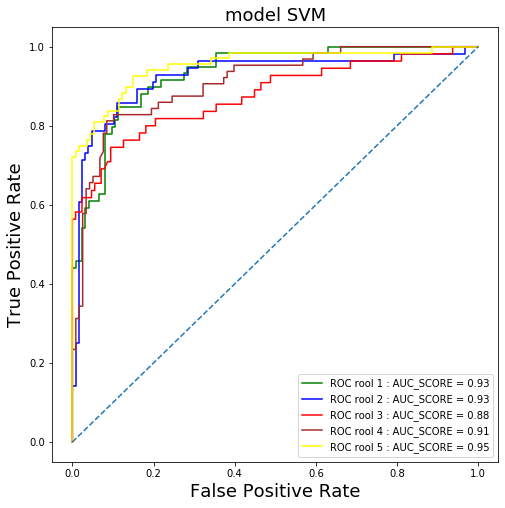

<Figure size 432x288 with 0 Axes>

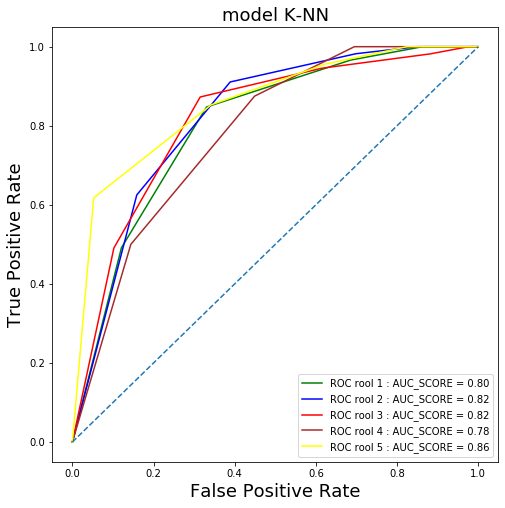

Final test
tn = 140
fp = 18
fn = 9
tp = 61

Sensitivity = 0.8714285714285714

Specificity = 0.8860759493670886

Accuracy = 0.881578947368421 

fold 0-----------------------
fold 1-----------------------
fold 2-----------------------
fold 3-----------------------
fold 4-----------------------
--------------------------------------------------------------------------
------------------------------This is svm---------------------------------
--------------------------------------------------------------------------
tn = 81
fp = 36
fn = 31
tp = 35

Sensitivity = 0.5303030303030303

Specificity = 0.6923076923076923

Accuracy = 0.6338797814207651 

Model = ensemble

Classification Report
--------------------------------------------------------------------------
------------------------------This is knn---------------------------------
--------------------------------------------------------------------------
tn = 108
fp = 64
fn = 4
tp = 7

Sensitivity = 0.6363636363636364

Specificity = 0.62

<Figure size 432x288 with 0 Axes>

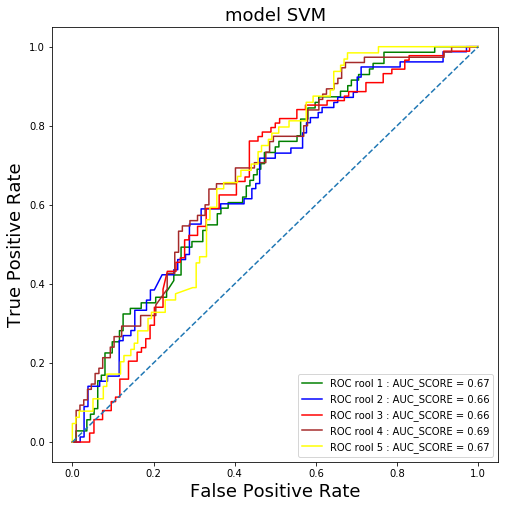

<Figure size 432x288 with 0 Axes>

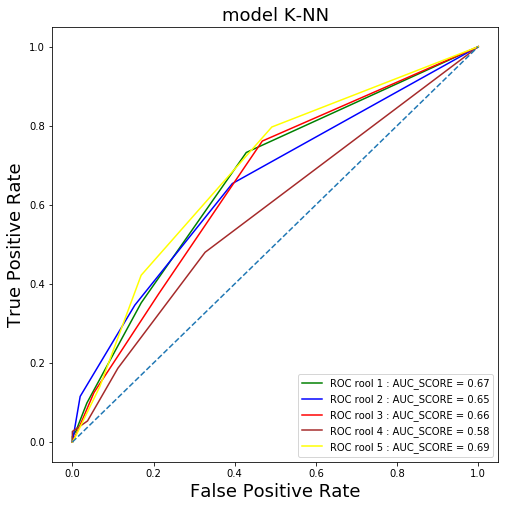

Final test
tn = 98
fp = 42
fn = 41
tp = 47

Sensitivity = 0.5340909090909091

Specificity = 0.7

Accuracy = 0.6359649122807017 

fold 0-----------------------
fold 1-----------------------
fold 2-----------------------
fold 3-----------------------
fold 4-----------------------
--------------------------------------------------------------------------
------------------------------This is svm---------------------------------
--------------------------------------------------------------------------
tn = 114
fp = 42
fn = 16
tp = 11

Sensitivity = 0.4074074074074074

Specificity = 0.7307692307692307

Accuracy = 0.6830601092896175 

Model = ensemble

Classification Report
--------------------------------------------------------------------------
------------------------------This is knn---------------------------------
--------------------------------------------------------------------------
tn = 128
fp = 49
fn = 2
tp = 4

Sensitivity = 0.6666666666666666

Specificity = 0.723163841807909

<Figure size 432x288 with 0 Axes>

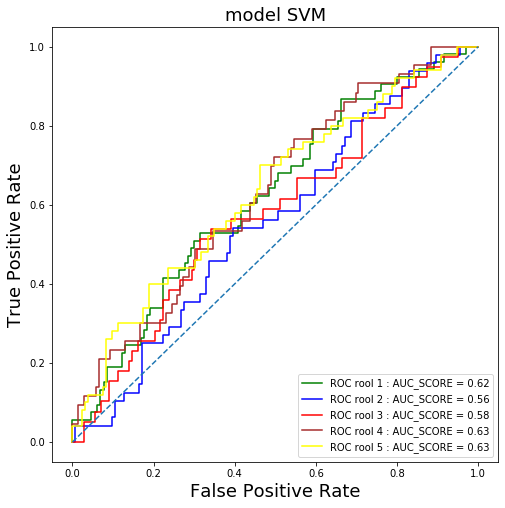

<Figure size 432x288 with 0 Axes>

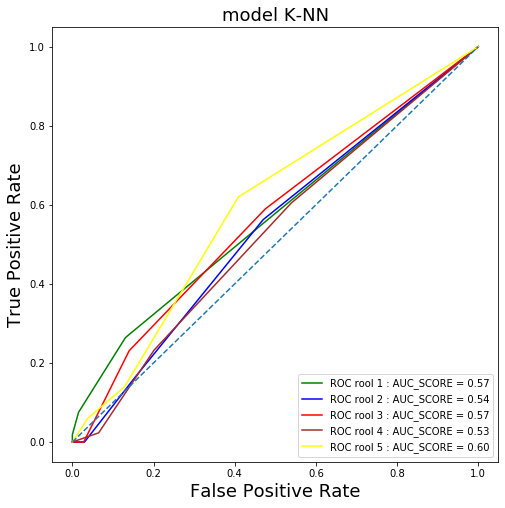

Final test
tn = 142
fp = 39
fn = 26
tp = 21

Sensitivity = 0.44680851063829785

Specificity = 0.7845303867403315

Accuracy = 0.7149122807017544 



In [77]:
    kk = []
    model = []
    for filename in ["G.pkl","N.pkl","O.pkl"]:
        dataset = readPickle(filename)
        X,y = dataset.features,dataset.label
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)

        kf = KFold(n_splits=5)
        dataall = []
        labelall = []
        svma = []
        knna = []
        knnplot = []
        svmplot = []
        best = 0
        bestacc = 0
        for ifold, (train_index, val_index) in enumerate(kf.split(X_train)): #restคือข้อมูลที่เราจะแบ่งเป็นfold หรือก็คือ train data
            print("fold %d-----------------------" %ifold) #ไว้แบ่งแต่ละ fold
            #print(len(train_index), len(val_index))
            #pprint(train_index[:10])
            #pprint(val_index[:10])
            
            train_set = [X_train[i] for i in train_index]
            val_set = [X_train[i] for i in val_index]
            train_label = [y_train[i] for i in train_index]
            val_label = [y_train[i] for i in val_index]
            dataall.append([train_set,val_set])
            labelall.append([train_label,val_label])

        for i in range(5):
            X_use = dataall[i][0]
            y_use = labelall[i][0]
            X_val = dataall[i][1]
            y_val = labelall[i][1]


            svm,knn,acc,list1,list2 = trainModel2(X_use,X_val,y_use,y_val,True)
            svmplot.append(list1)
            knnplot.append(list2)
            kk.append(list1)
            kk.append(list2)
            
            knna.append(knn)
            svma.append(svm)
            if acc> bestacc:
                best = i
                bestacc = acc
        
        
        
        plotcurve(svmplot[0],svmplot[1],svmplot[2],svmplot[3], svmplot[4],"SVM") 
        plotcurve(knnplot[0],knnplot[1],knnplot[2],knnplot[3], knnplot[4],"K-NN") 
        bestSVM = svma[best]
        bestKNN = knna[best]
        
        y_pred_svm = bestSVM.predict(X_test)
        
        tp,tn,fp,fn = checkk(y_test,y_pred_svm)
        
        print("Final test")
        print("tn =",tn)
        print("fp =",fp)
        print("fn =",fn)
        print("tp =",tp)
        sen=tp/(tp+fn)
        print ('\nSensitivity =', sen)
        spec= tn/(tn+fp)
        print ('\nSpecificity =', spec)
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        print ('\nAccuracy =', accuracy,'\n')
        
        model.append([bestSVM,bestKNN])
        
    svmModel = []
    knnModel = []
    for mod in model:
        svmModel.append(mod[0])
        knnModel.append(mod[1])
    
    with open("svmModel.model",'wb') as file:
        pickle.dump(svmModel,file)
        
    with open("knnModel.model",'wb') as file:
        pickle.dump(knnModel,file)      

In [ ]:
with open("svmModel.pkl",'rb') as file:
    modelList = pickle.load(file)
label = ['glaucoma','normal','others']

y_pred = model[0].predict(())

In [81]:
def fix(i1,i2,max):
    if(i1 < 10):
        return 0, i2-i1
    if(i2>max):
        return i1-i2+max, max
    return i1,i2

def crop(image):
    width,height,n = image.shape
    loc = cv2.minMaxLoc(image[:,:,1])
    x = loc[3][0]
    y = loc[3][1]
    size = width/3

    y1, y2, x1, x2 = y-int(size/2), y+int(size/2), x-int(size/2), x+int(size/2)


    y1,y2 = fix(y1,y2,width)
    x1,x2 = fix(x1,x2,height)

    



    cropPic = image[y1:y2,x1:x2,]

    return cropPic

In [ ]:
main()

In [89]:
import cv2
image = cv2.imread("38_left.jpg")[:,:,::-1]
image = crop(image)
print(predict(image))

NameError: name 'resize' is not defined

In [113]:
import cv2
image = cv2.imread("38_left.jpg")[:,:,::-1]
image = crop(image)
print(predict(image))

def predict(image):
    x,y = image[:,:,1].shape
    if np.count_nonzero(image < 4)/(x*y) > 0.2:
        image = crop(image)
    image = resize(image,240,240)
    label = ['glaucoma','normal','others']
    feature = findhog(image)
    
    print(findhog(image))

    with open("svmModel.pkl",'rb') as file:
        modelList = pickle.load(file)

    labelG = modelList[0].predict(feature)
    labelN = modelList[1].predict(feature)
    labelO = modelList[2].predict(feature)

    label = {"glaucoma":labelG,"normal":labelN,"Others":labelO}

    prediction = ""

    if labelG+labelN+lebelO == 1:
        for i in label:
            if label[i] == 1: 
                prediction = i
    elif labelG+labelN+lebelO == 2:
        l = []
        for i in label:
            if label[i] == 1: 
                l.append(i)
        if 'normal' in l: prediction = i
        else: prediction = l[0]
    elif labelG+labelN+lebelO == 3:
        prediction = "others"

    else: prediction = 'normal'

    return prediction




0.22008809510183053


ValueError: Expected 2D array, got 1D array instead:
array=[0.2305143  0.1366441  0.16287725 ... 0.17786973 0.12535077 0.2200881 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

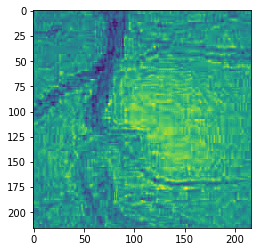

0 46656
glaucoma


In [135]:
import cv2
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

def findhog(image):
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
    return fd

def predict(image):
    g = image[:,:,0]
    x,y = image[:,:,1].shape
    print(np.count_nonzero(g <5 ),(x*y))
    if np.count_nonzero(g < 20)/(x*y) > 0.1:
        image = crop(image)
        print("here")
    plt.imshow(g)
    plt.show()
    image = cv2.resize(image,(240,240), interpolation=cv2.INTER_LINEAR)
    label = ['glaucoma','normal','others']
    feature = findhog(image).reshape(1,-1)
    

    with open("svmModel.model",'rb') as file:
        modelList = pickle.load(file)

    labelG = modelList[0].predict(feature)
    labelN = modelList[1].predict(feature)
    labelO = modelList[2].predict(feature)

    label = {"glaucoma":labelG,"normal":labelN,"Others":labelO}

    prediction = ""

    if labelG+labelN+labelO == 1:
        for i in label:
            if label[i] == 1: 
                prediction = i
    elif labelG+labelN+labelO == 2:
        l = []
        for i in label:
            if label[i] == 1: 
                l.append(i)
        if 'normal' in l: prediction = i
        else: prediction = l[0]
    elif labelG+labelN+labelO == 3:
        prediction = "others"

    else: prediction = 'normal'

    return prediction

image = cv2.imread("38_left.jpg")[:,:,::-1]
print(predict(image))
